## Data Overview

Dataset ini bernama nyc-rolling-sales.csv yang berisi lokasi, alamat, tipe, harga jual, dan tanggal penjualan unit bangunan yang terjual. Referensi di bidang yang lebih rumit:

BOROUGH : Kode digit untuk borough tempat properti berada; agar ini adalah Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5).
MEMBLOKIR; BANYAK : Kombinasi borough, blok, dan lot membentuk kunci unik untuk properti di New York City. Biasa disebut BBL.
KELAS BANGUNAN SAAT INI dan KELAS BANGUNAN SAAT DIJUAL : : Jenis bangunan pada berbagai titik waktu.
Perhatikan bahwa karena ini adalah kumpulan data transaksi keuangan, ada beberapa hal yang perlu diingat:

Banyak penjualan terjadi dengan jumlah dolar yang sangat kecil: $0 paling sering. Penjualan ini sebenarnya adalah pengalihan akta antar pihak: misalnya, orang tua mengalihkan kepemilikan rumah mereka kepada seorang anak setelah pindah untuk pensiun.
Kumpulan data ini menggunakan definisi keuangan dari sebuah bangunan/unit bangunan, untuk tujuan perpajakan. Dalam hal satu entitas memiliki bangunan tersebut, penjualan mencakup nilai seluruh bangunan. Jika sebuah bangunan dimiliki sedikit demi sedikit oleh penghuninya (kondominium), penjualan mengacu pada satu apartemen (atau sekelompok apartemen) yang dimiliki oleh beberapa individu.

In [1]:
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
import string
import seaborn as sns
import datetime
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('nyc.csv', skipinitialspace=True)
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,NaN,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,NaN,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,NaN,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,NaN,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [4]:
df.shape

(84548, 22)

In [5]:
df.isnull().sum().sort_values(ascending=False)

EASE-MENT                         84548
APARTMENT NUMBER                  65496
TAX CLASS AT PRESENT                738
BUILDING CLASS AT PRESENT           738
Unnamed: 0                            0
COMMERCIAL UNITS                      0
SALE PRICE                            0
BUILDING CLASS AT TIME OF SALE        0
TAX CLASS AT TIME OF SALE             0
YEAR BUILT                            0
GROSS SQUARE FEET                     0
LAND SQUARE FEET                      0
TOTAL UNITS                           0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
BOROUGH                               0
ADDRESS                               0
LOT                                   0
BLOCK                                 0
BUILDING CLASS CATEGORY               0
NEIGHBORHOOD                          0
SALE DATE                             0
dtype: int64

In [6]:
##Penghapusan data Unnamed: 0 karena karena tidak sesuai dengan proses analisis 
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
##Penghapusan Ease-Ment karena datanya kosong/blank
df.drop('EASE-MENT', axis=1, inplace=True)

In [8]:
df.isnull().sum().sort_values(ascending=False)

APARTMENT NUMBER                  65496
TAX CLASS AT PRESENT                738
BUILDING CLASS AT PRESENT           738
BOROUGH                               0
TOTAL UNITS                           0
SALE PRICE                            0
BUILDING CLASS AT TIME OF SALE        0
TAX CLASS AT TIME OF SALE             0
YEAR BUILT                            0
GROSS SQUARE FEET                     0
LAND SQUARE FEET                      0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
NEIGHBORHOOD                          0
ZIP CODE                              0
ADDRESS                               0
LOT                                   0
BLOCK                                 0
BUILDING CLASS CATEGORY               0
SALE DATE                             0
dtype: int64

In [9]:
df.drop(labels=['ADDRESS','APARTMENT NUMBER', 'ZIP CODE'], axis=1, inplace=True)

In [10]:
#'SALE PRICE'diubah menjadi data numeric
df['SALE PRICE']= pd.to_numeric(df['SALE PRICE'], errors='coerce')
# 'LAND SQUARE FEET' and 'GROSS SQUARE FEET' should be numeric
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

# 'SALE DATE' diubah menjadi data datetime
df['SALE DATE']=pd.to_datetime(df['SALE DATE'], errors='coerce')
# kolom diubah ditata secara categorical
categorical = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT',
         'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categorical:
    df[col] = df[col].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            83810 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83810 non-null  category      
 7   RESIDENTIAL UNITS               84548 non-null  int64         
 8   COMMERCIAL UNITS                84548 non-null  int64         
 9   TOTAL UNITS                     84548 non-null  int64         
 10  LAND SQUARE FEET                58296 non-null  float64       
 11  GR

In [12]:
sum(df.duplicated())

959

In [13]:
missing_value = df.isnull().sum()/len(df)*100
print(pd.DataFrame([missing_value[missing_value>0], pd.Series(df.isnull().sum()[df.isnull().sum()>1000])],
                  index=['percent missing', 'num of missing']))

                 TAX CLASS AT PRESENT  BUILDING CLASS AT PRESENT  \
percent missing              0.872877                   0.872877   
num of missing                    NaN                        NaN   

                 LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE  
percent missing         31.049818          32.658372     17.22217  
num of missing       26252.000000       27612.000000  14561.00000  


In [14]:
df['SALE PRICE'].describe()

count    6.998700e+04
mean     1.276456e+06
std      1.140526e+07
min      0.000000e+00
25%      2.250000e+05
50%      5.300000e+05
75%      9.500000e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64

In [15]:
df=df[df['SALE PRICE'].notnull()]
df=df[df['LAND SQUARE FEET'].notnull()]
df=df[df['GROSS SQUARE FEET'].notnull()]

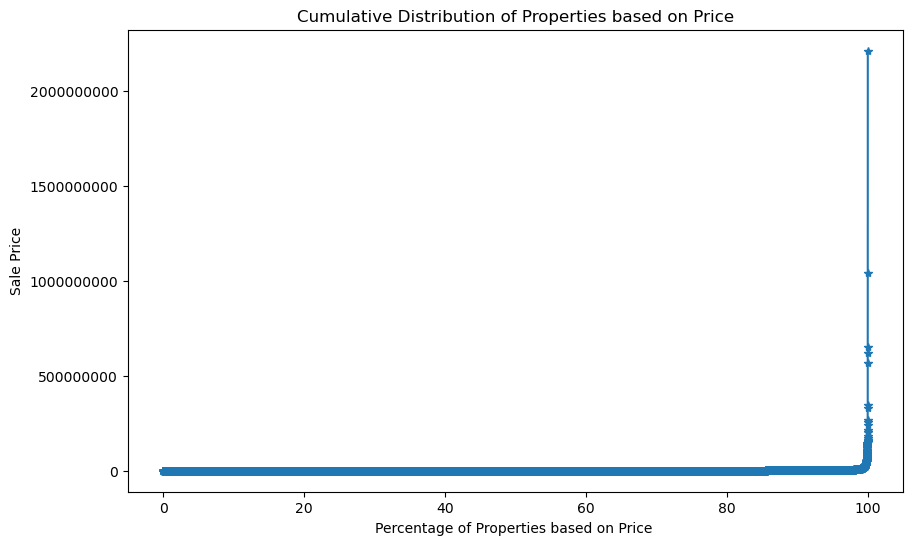

In [16]:
x= df[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION']= 1
x['PROPERTY PROPORTION']= x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100 * x['PROPERTY PROPORTION']/len(x['PROPERTY PROPORTION'])

#set size for the plot
plt.figure(figsize=(10,6))

#plot the data
plt.plot(x['PROPERTY PROPORTION'], x['SALE PRICE'], linestyle=None, marker='*')
plt.title("Cumulative Distribution of Properties based on Price")
plt.xlabel("Percentage of Properties based on Price ")
plt.ylabel("Sale Price")
plt.ticklabel_format(style='plain',axis='y')
plt.show()

In [17]:
df= df[(df['SALE PRICE']>100000) & (df['SALE PRICE']<5000000)]

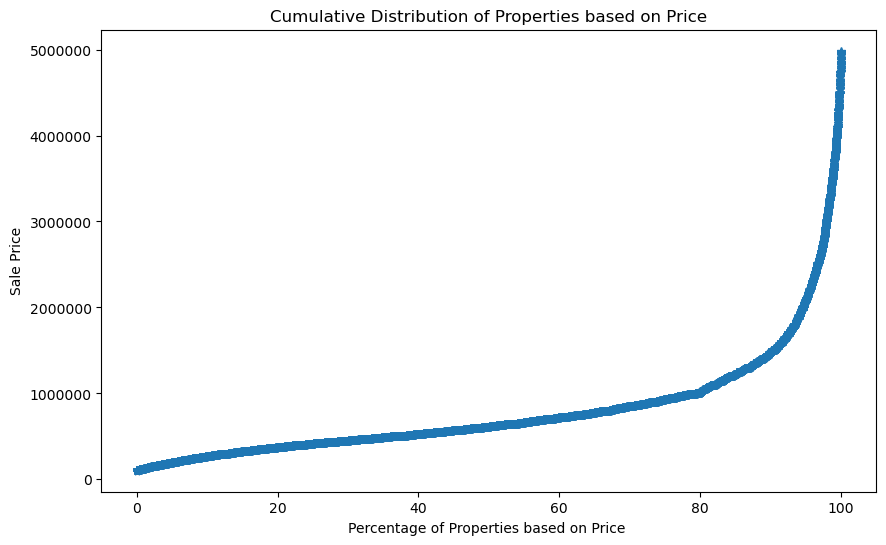

In [18]:
x = df[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION']= 1
x['PROPERTY PROPORTION']= x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100 * x['PROPERTY PROPORTION']/len(x['PROPERTY PROPORTION'])

plt.figure(figsize=(10,6))
plt.plot(x['PROPERTY PROPORTION'], x['SALE PRICE'], linestyle=None, marker='*')
plt.title("Cumulative Distribution of Properties based on Price")
plt.xlabel("Percentage of Properties based on Price ")
plt.ylabel("Sale Price")
plt.ticklabel_format(style='plain',axis='y')
plt.show()

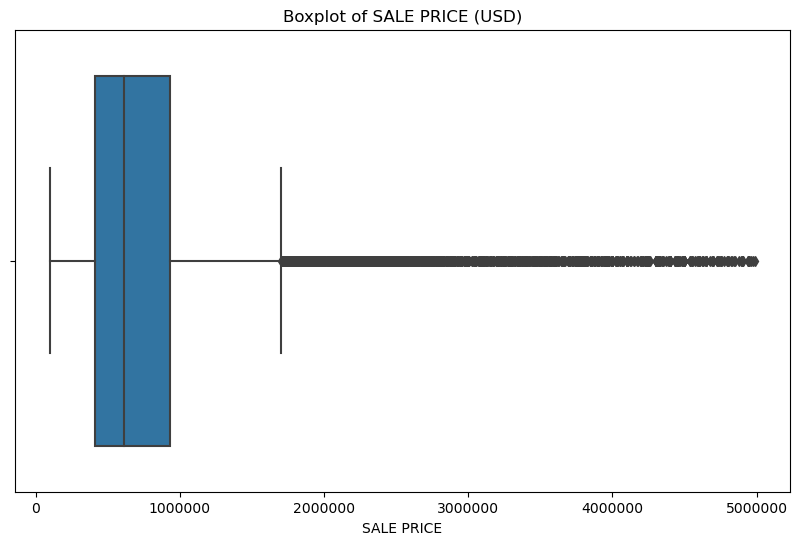

In [19]:
# kurva plot menggunakan boxplot untuk melihat tampilan lain dari data
plt.figure(figsize=(10,6))
sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot of SALE PRICE (USD)")
plt.show()

In [20]:
mean = df['SALE PRICE'].mean()
median= df['SALE PRICE'].median()
print(mean)
print(median)

795438.5577033713
615000.0


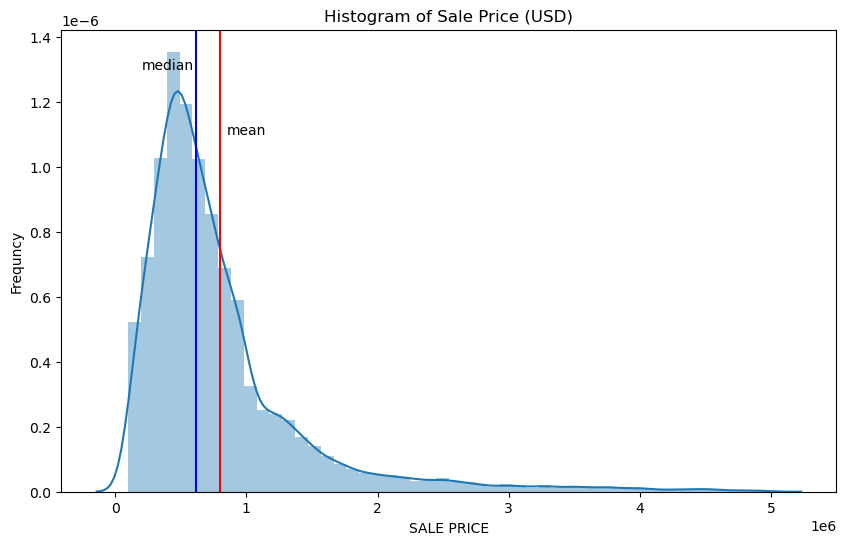

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(df['SALE PRICE'])
plt.title('Histogram of Sale Price (USD)')
plt.ylabel("Frequncy")
plt.axvline(df[(df['SALE PRICE']>100000) & (df['SALE PRICE'] < 5000000)]['SALE PRICE'].mean(), c='red')
plt.axvline(df[(df['SALE PRICE']>100000) & (df['SALE PRICE'] < 5000000)]['SALE PRICE'].median(), c='blue')
plt.text(200000,0.0000013, "median")
plt.text(850000,0.0000011, "mean")
plt.show()

0.14698712708587405


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

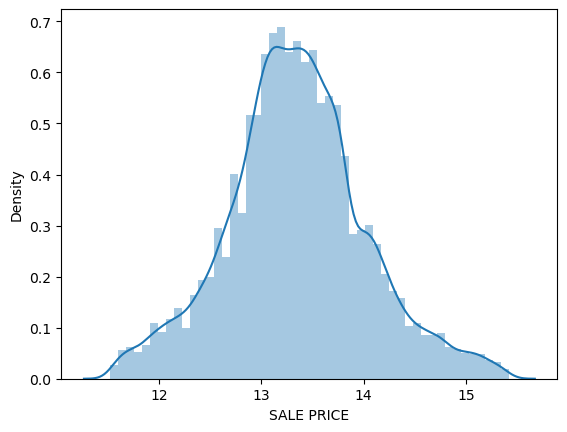

In [22]:
# let's normalize the data
df['SALE PRICE']=np.log(df['SALE PRICE'])
print(df['SALE PRICE'].skew())
sns.distplot(df['SALE PRICE'])

In [23]:
missing_value = df.isnull().sum()/len(df)*100
print(pd.DataFrame([missing_value[missing_value>0], pd.Series(df.isnull().sum()[df.isnull().sum()>1000])],
                  index=['percent missing', 'num of missing']))

                 TAX CLASS AT PRESENT  BUILDING CLASS AT PRESENT
percent missing              0.753653                   0.753653
num of missing                    NaN                        NaN


In [24]:
df.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
BOROUGH,0.059109,-0.518117
BLOCK,0.759157,0.109174
LOT,3.628359,19.801475
RESIDENTIAL UNITS,125.934069,19433.980127
COMMERCIAL UNITS,184.214589,34193.414547
TOTAL UNITS,111.529779,13848.307599
LAND SQUARE FEET,103.183909,13000.093788
GROSS SQUARE FEET,139.954393,22965.995215
YEAR BUILT,-4.275920,16.432230
SALE PRICE,0.146987,0.295063


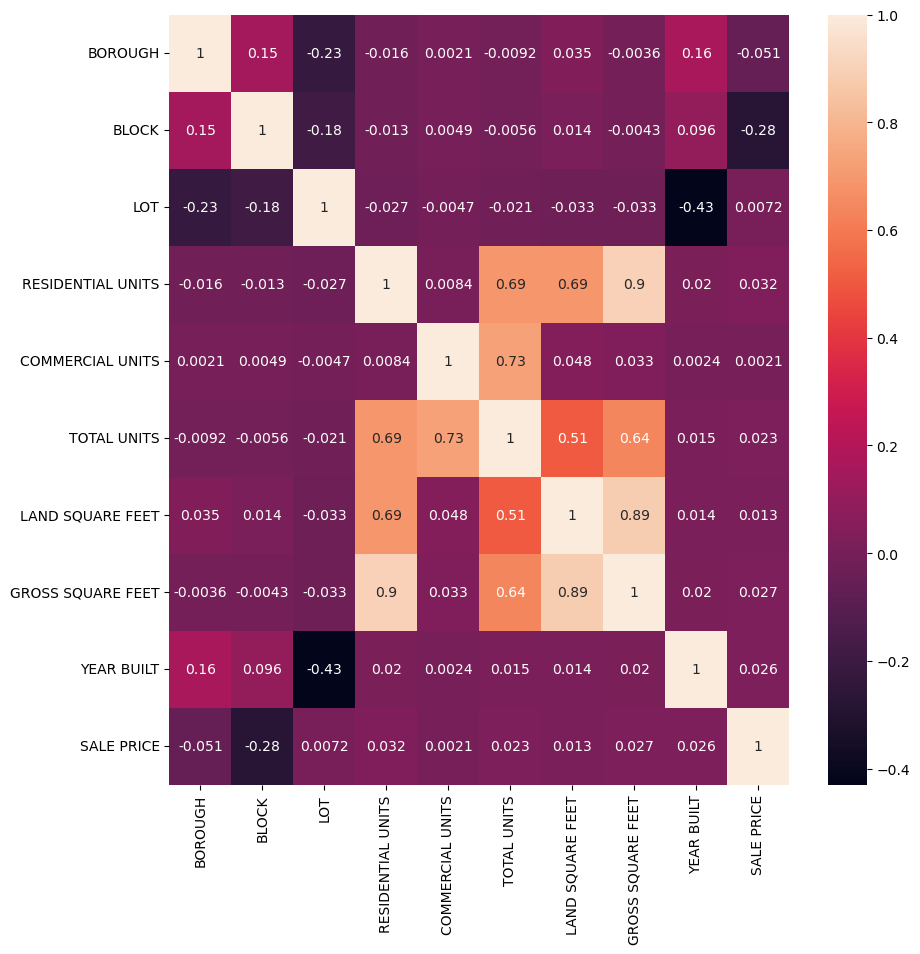

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [26]:
df.describe()

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,34764.000000,34764.000000,34764.000000,34764.000000,34764.000000,34764.000000,3.476400e+04,3.476400e+04,34764.000000,34764.000000
mean,3.432056,5253.731533,225.184588,1.730871,0.157318,1.890318,2.918135e+03,2.112480e+03,1856.489903,13.345393
std,0.917074,3632.960798,476.291589,11.456939,12.176339,16.788291,2.960291e+04,2.232229e+04,410.042476,0.680468
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,11.519901
25%,3.000000,2332.000000,21.000000,1.000000,0.000000,1.000000,1.360000e+03,8.750000e+02,1920.000000,12.936034
50%,3.000000,4834.000000,45.000000,1.000000,0.000000,1.000000,2.193000e+03,1.520000e+03,1935.000000,13.329378
75%,4.000000,7358.000000,96.000000,2.000000,0.000000,2.000000,3.142000e+03,2.252500e+03,1963.000000,13.742940
max,5.000000,16319.000000,7501.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,15.422227


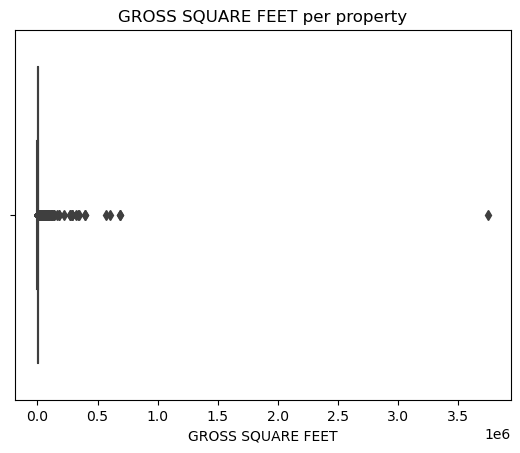

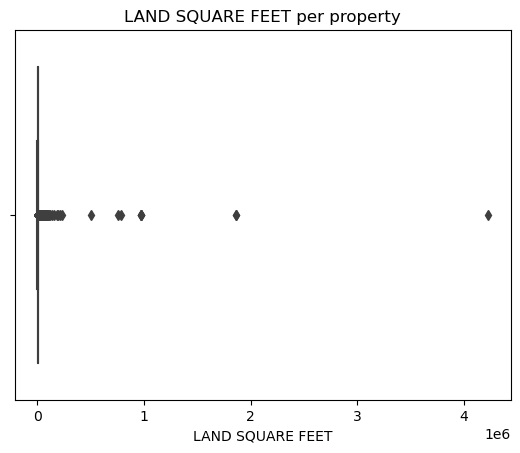

In [27]:
sns.boxplot(x='GROSS SQUARE FEET',data=df)
plt.title('GROSS SQUARE FEET per property')
plt.show()

sns.boxplot(x='LAND SQUARE FEET',data=df)
plt.title('LAND SQUARE FEET per property')
plt.show()

In [28]:
# untuk menghilangkan outliers, ambil data kurang dari 20000
df = df[df['GROSS SQUARE FEET'] < 20000]
df = df[df['LAND SQUARE FEET'] < 20000]

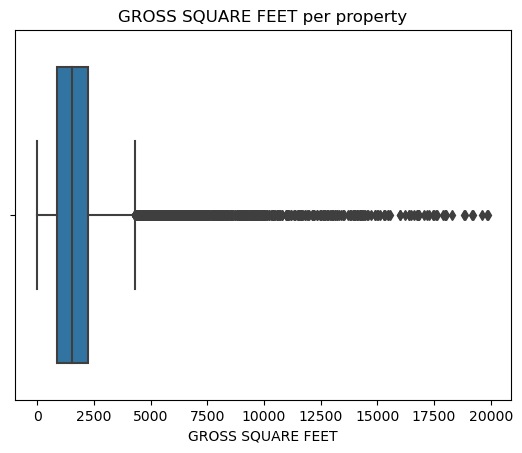

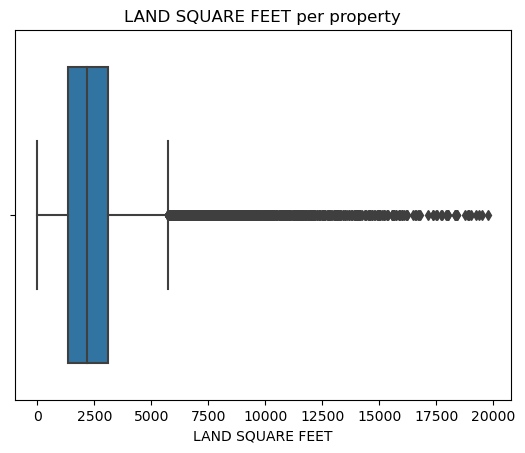

In [29]:
sns.boxplot(x='GROSS SQUARE FEET',data=df)
plt.title('GROSS SQUARE FEET per property')
plt.show()

sns.boxplot(x='LAND SQUARE FEET',data=df)
plt.title('LAND SQUARE FEET per property')
plt.show()

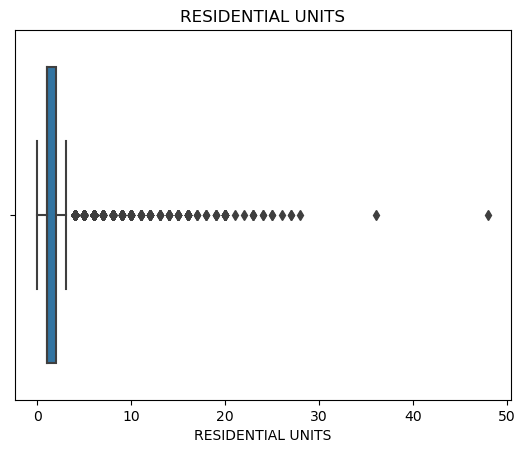

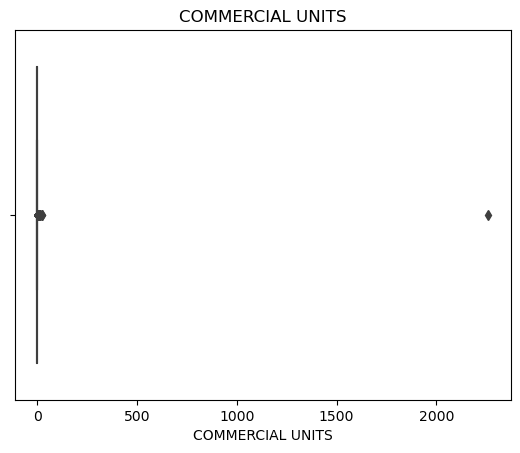

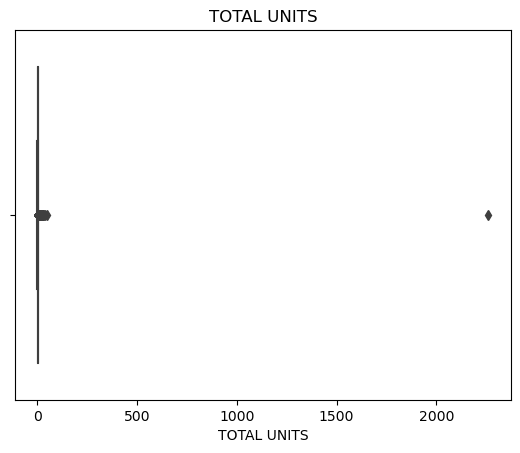

In [30]:

sns.boxplot(x='RESIDENTIAL UNITS',data=df)
plt.title('RESIDENTIAL UNITS')
plt.show()

sns.boxplot(x='COMMERCIAL UNITS',data=df)
plt.title('COMMERCIAL UNITS')
plt.show()

sns.boxplot(x='TOTAL UNITS',data=df)
plt.title('TOTAL UNITS')
plt.show()

In [31]:
# hapus data properti sisa yang memiliki nilai 0 unit total
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] < 30)]

#Hapus data dimana 'COMMERCIAL UNITS' + 'RESIDENTIAL UNITS' tidak sama dengan total units
df = df[df['TOTAL UNITS'] == df['COMMERCIAL UNITS'] + df['RESIDENTIAL UNITS']]

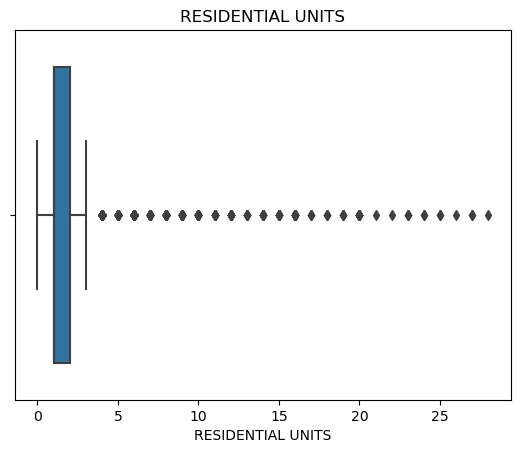

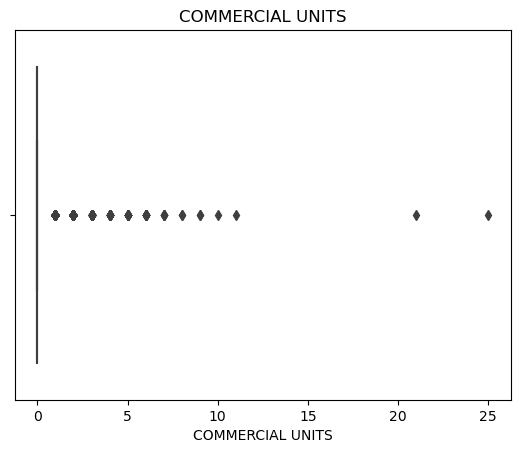

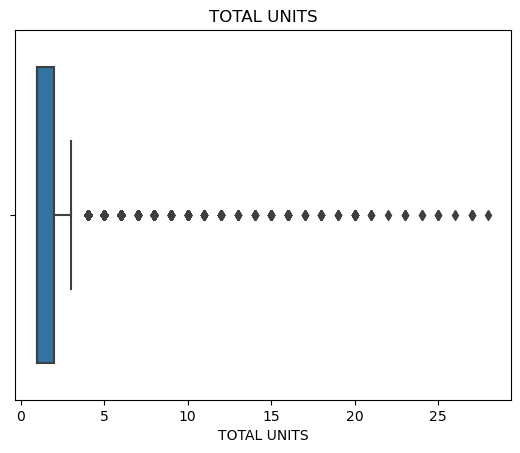

In [32]:
sns.boxplot(x='RESIDENTIAL UNITS',data=df)
plt.title('RESIDENTIAL UNITS')
plt.show()

sns.boxplot(x='COMMERCIAL UNITS',data=df)
plt.title('COMMERCIAL UNITS')
plt.show()

sns.boxplot(x='TOTAL UNITS',data=df)
plt.title('TOTAL UNITS')
plt.show()

In [33]:
df['BOROUGH'] = df['BOROUGH'].astype(str)
df['BOROUGH'] = df['BOROUGH'].str.replace("1", "Manhattan")
df['BOROUGH'] = df['BOROUGH'].str.replace("2", "Bronx")
df['BOROUGH'] = df['BOROUGH'].str.replace("3", "Brooklyn")
df['BOROUGH'] = df['BOROUGH'].str.replace("4", "Queens")
df['BOROUGH'] = df['BOROUGH'].str.replace("5", "Staten Island")


In [34]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10,0,10,2272.0,6794.0,1913,2,C4,15.185745,2016-09-23
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,8,0,8,1750.0,4226.0,1920,2,C4,14.976421,2016-09-23
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,S3,3,1,4,1520.0,3360.0,1910,2,S3,15.009433,2016-11-15
174,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394,5,S5,5,1,6,1779.0,3713.0,1910,2,S5,15.373655,2017-04-03
195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,K4,0,1,1,1218.0,3586.0,1899,4,K4,15.123843,2016-09-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84540,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,93,B2,2,0,2,3325.0,1300.0,1995,1,B2,13.140203,2016-10-31
84541,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,B2,2,0,2,11088.0,2160.0,1994,1,B2,13.381646,2016-12-07
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,2,0,2,2400.0,2575.0,1998,1,B9,13.017003,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,2,0,2,2498.0,2377.0,1998,1,B9,13.217674,2017-04-21


In [35]:
print(df['BUILDING CLASS CATEGORY'].mode())
df['BUILDING CLASS CATEGORY'].value_counts()

0    01 ONE FAMILY DWELLINGS                    
Name: BUILDING CLASS CATEGORY, dtype: category
Categories (47, object): ['01 ONE FAMILY DWELLINGS                    ', '02 TWO FAMILY DWELLINGS                    ', '03 THREE FAMILY DWELLINGS                  ', '04 TAX CLASS 1 CONDOS                      ', ..., '46 CONDO STORE BUILDINGS                   ', '47 CONDO NON-BUSINESS STORAGE              ', '48 CONDO TERRACES/GARDENS/CABANAS          ', '49 CONDO WAREHOUSES/FACTORY/INDUS          ']


01 ONE FAMILY DWELLINGS                         12352
02 TWO FAMILY DWELLINGS                          9530
13 CONDOS - ELEVATOR APARTMENTS                  2439
03 THREE FAMILY DWELLINGS                        2240
07 RENTALS - WALKUP APARTMENTS                   1322
15 CONDOS - 2-10 UNIT RESIDENTIAL                 740
04 TAX CLASS 1 CONDOS                             510
12 CONDOS - WALKUP APARTMENTS                     366
22 STORE BUILDINGS                                340
14 RENTALS - 4-10 UNIT                            285
29 COMMERCIAL GARAGES                             126
21 OFFICE BUILDINGS                               116
30 WAREHOUSES                                     107
27 FACTORIES                                       62
37 RELIGIOUS FACILITIES                            37
05 TAX CLASS 1 VACANT LAND                         24
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT         13
33 EDUCATIONAL FACILITIES                          12
32 HOSPITAL AND HEALTH FACIL

In [36]:
df.var()

BLOCK                1.390572e+07
LOT                  2.337610e+05
RESIDENTIAL UNITS    2.160328e+00
COMMERCIAL UNITS     2.006787e-01
TOTAL UNITS          2.365931e+00
LAND SQUARE FEET     3.833540e+06
GROSS SQUARE FEET    2.377459e+06
YEAR BUILT           1.207277e+05
SALE PRICE           4.085752e-01
dtype: float64

In [37]:
df_borough = df.groupby('BOROUGH', axis=0).sum()
df_borough

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,
Bronx,14985170,1128314,7314,357,7671,9360717.0,8158210.0,6511443,46542.171117
Brooklyn,48589305,4869909,20909,1132,22041,18994144.0,19958687.0,21042113,158563.079896
Manhattan,469023,16696,1423,93,1516,551817.0,1306903.0,533046,4053.989703
Queens,84057305,566007,16384,825,17209,33429841.0,19642843.0,20235377,139285.733894
Staten Island,16292069,394884,6232,177,6409,18593147.0,8335321.0,9462729,62921.680784


In [38]:
Bronx = df[df['BOROUGH']=='Bronx']
Staten_Island = df[df['BOROUGH']=='Staten Island']

In [39]:
total_unit_Bronx = df_borough.iloc[0, 4]
mu_Bronx = Bronx['SALE PRICE'].mean()
std_Bronx = Bronx['SALE PRICE'].std()
total_unit_Bronx, mu_Bronx, std_Bronx

(7671, 13.000606457210784, 0.5894789114895546)

In [40]:
total_unit_SI = df_borough.iloc[-1, 4]
mu_SI = Staten_Island['SALE PRICE'].mean()
std_SI = Staten_Island['SALE PRICE'].std()
total_unit_SI, mu_SI, std_SI

(6409, 13.084150714105025, 0.4194415379837698)

In [41]:
from statsmodels.stats.weightstats import ztest
ztest, pval= ztest(Staten_Island['SALE PRICE'],Bronx['SALE PRICE'])
print("pval: ",float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

pval:  3.390836977136026e-14
reject null hypothesis


hasil yang didapat diatas ini dapat ditarik kesimpulan bahwa ada perbedaan pada harga rata-rata per unit antara borugh Staten Island dengan Bronx

## Analisis Keseluruhan 
Pada Assigment ke 2 ini sya melakukan implementasi Mean,Median,Modus,Range,Variance, Spread Standard, Menganalisa distribusi, Menarik kesimpulan, Melakukan preproces dataset agar dapat digunakan dari Kolom/Data spesifik menggunakan pandas,numpy,scipy